In [1]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile
import tensorflow 
from scipy.fftpack import fft, dct
import numpy as np

2023-05-24 14:08:57.969664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 14:09:05.217202: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<class 'numpy.ndarray'>


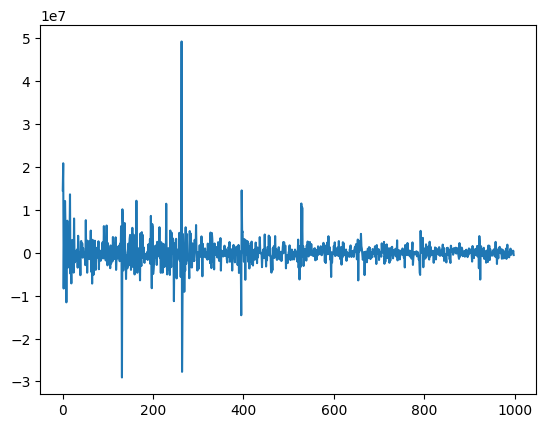

44100


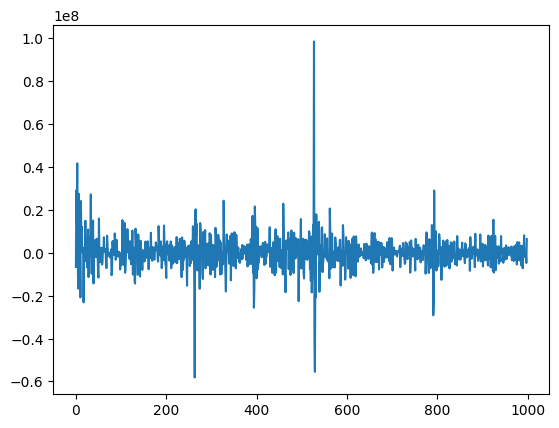

In [11]:
Fs, aud = wavfile.read('//speech/db/mul/audio/music/tency1/part1/adele_set-fire-to-the-rain-(moto-blanco-edit)_40287/multi/synth bass.wav')
# select left channel only
aud = aud[:,0]
# trim the first 125 seconds
first = aud[:int(Fs*125)]

print(type(first))

dct_a = dct(first, 1)
fft_a = fft(first)
plt.plot(fft_a[1:1000])
plt.show()
plt.plot(dct_a[1:1000])
print(Fs)

In [1]:
import numpy as np
import tensorflow as tf 
tf.signal.stft(aud,Fs,frame_step = 0.1,fft_length=None,window_fn=tf.signal.hann_window,
    pad_end=False,
    name=None
)
#

2023-06-02 17:07:20.902161: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 17:07:23.662593: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


NameError: name 'aud' is not defined

/home/dearadhp/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


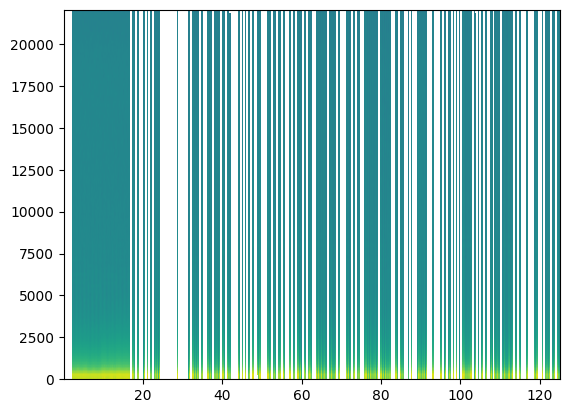

In [ ]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
plt.show()

In [19]:


import tensorflow as tf 
import tensorflow.keras as keras



In [20]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [21]:
x_train = x_train/255
y_train = y_train/255


In [22]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(10, activation='softmax')])

2023-05-11 16:35:45.488220: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11387 MB memory:  -> device: 0, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:02:00.0, compute capability: 6.1
2023-05-11 16:35:45.490128: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10370 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:04:00.0, compute capability: 6.1
2023-05-11 16:35:45.490701: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 11387 MB memory:  -> device: 2, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:84:00.0, compute capability: 6.1
2023-05-11 16:35:45.491249: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 11437 MB memory:  -> device: 3, name: NVIDIA GeForce GTX T

In [23]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, batch_size=32, epochs=30,validation_data=(x_test, y_test))

Epoch 1/30


2023-05-11 16:37:03.364478: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f36737fff60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-11 16:37:03.364531: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA TITAN X (Pascal), Compute Capability 6.1
2023-05-11 16:37:03.364542: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (1): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2023-05-11 16:37:03.364550: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (2): NVIDIA TITAN X (Pascal), Compute Capability 6.1
2023-05-11 16:37:03.364558: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (3): NVIDIA GeForce GTX TITAN X, Compute Capability 5.2
2023-05-11 16:37:07.340738: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8800
2023-05-11 16:37:07.561122: E tensorflow/compiler/xla/stream_ex

   1/1875 [..............................] - ETA: 3:18:54 - loss: 2.7710 - accuracy: 0.0000e+00

2023-05-11 16:37:07.774077: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2023-05-11 16:37:07.862427: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1875/1875 [==============================] - 12s 3ms/step - loss: 0.0205 - accuracy: 0.0984 - val_loss: 2717.2671 - val_accuracy: 0.0980
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 7.9928e-04 - accuracy: 0.0987 - val_loss: 3002.7063 - val_accuracy: 0.0980
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 4.5358e-04 - accuracy: 0.0987 - val_loss: 3172.3599 - val_accuracy: 0.0980
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 3.1642e-04 - accuracy: 0.0987 - val_loss: 3293.8274 - val_accuracy: 0.0980
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4264e-04 - accuracy: 0.0987 - val_loss: 3388.6897 - val_accuracy: 0.0980
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9656e-04 - accuracy: 0.0987 - val_loss: 3466.6648 - val_accuracy: 0.0980
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6506e-04 - accuracy: 0.0987 - 

In [25]:
print(type(history))

<class 'keras.callbacks.History'>


In [28]:
print(history)

In [ ]:
import pydub

In [6]:

!git clone https://github.com/PrafulAradhyamth/req.git

Cloning into 'req'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 2.44 KiB | 73.00 KiB/s, done.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import librosa
import librosa.display

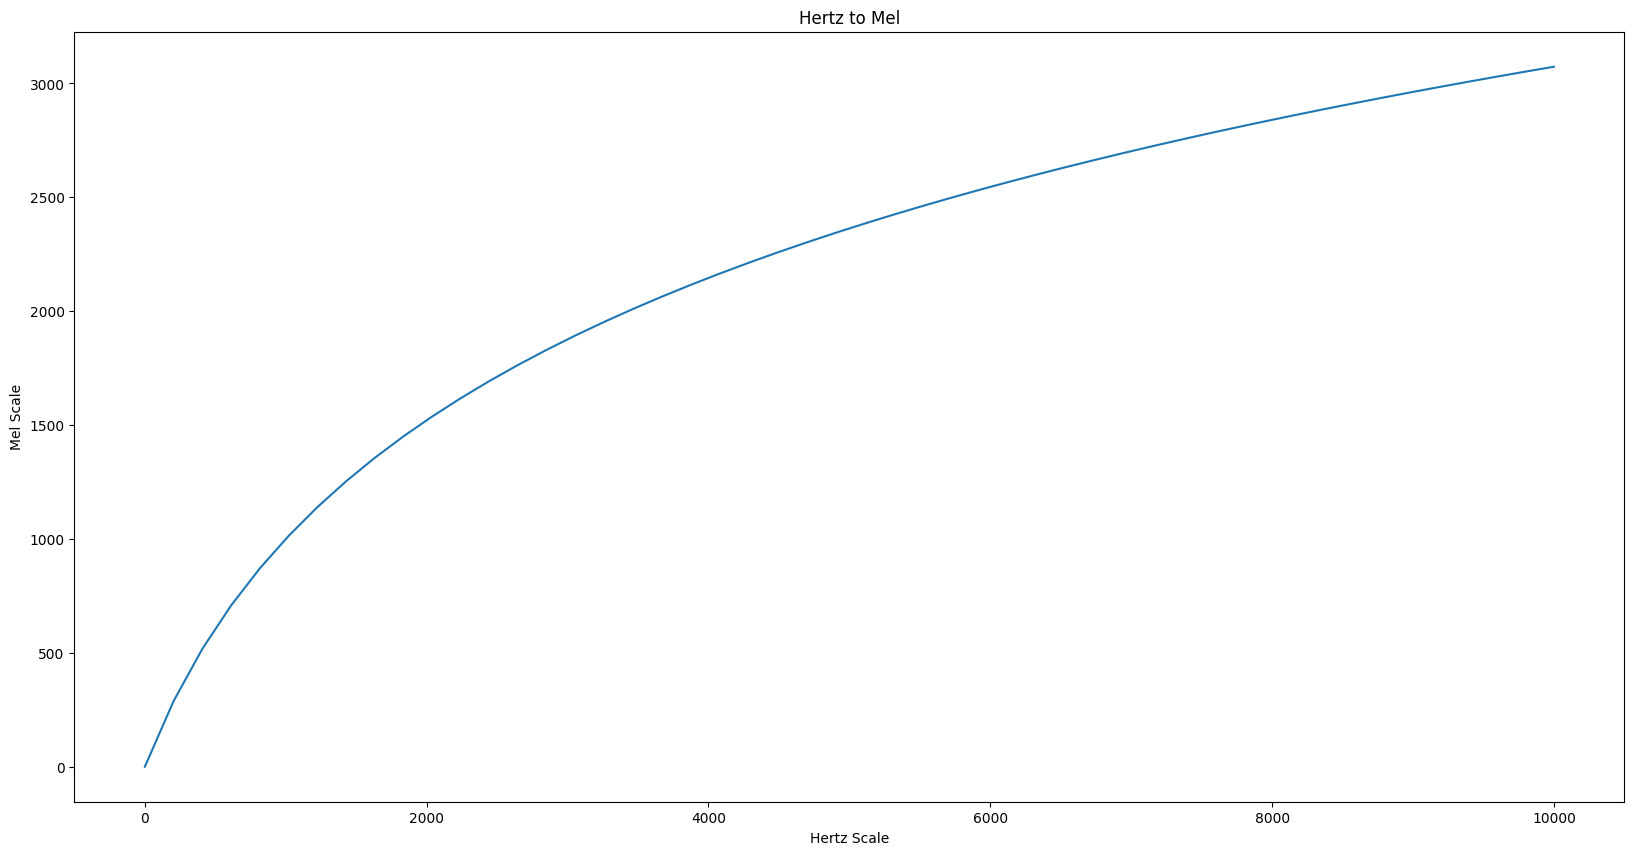

In [3]:
# Create function to convert Hz to Mels
def freqToMel(f):
    return 1127 * math.log(1 + (f/700))

# Vectorize function to apply to numpy arrays
freqToMelv = np.vectorize(freqToMel)

# Observing 0 to 10,000 Hz
Hz = np.linspace(0,1e4) 
# Now we just apply the vectorized function to the Hz variable
Mel = freqToMelv(Hz) 

# Plotting the figure:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(Hz, Mel)
plt.title('Hertz to Mel')
plt.xlabel('Hertz Scale')
plt.ylabel('Mel Scale')
plt.show()

In [4]:
# Using env_mask from wave form articles
def env_mask(wav, threshold):
    # Absolute value
    wav = np.abs(wav)
    # Point wise mask determination.
    mask = wav > threshold
    return wav[mask]

In [14]:
#Load in the sounds
guitar, _ = librosa.load("//speech/db/mul/audio/music/tency1/part0/rag-n-bone-man_human_51837/rag'n'bone man - human - 51837 - nbv.wav")


# Mask audio to trim out dead noise (simple data cleaning)
guitar = env_mask(guitar, 0.005)


# Create Mel Spectrograms of sounds
print(type(guitar))


# Plot mel spectrograms



<class 'numpy.ndarray'>


In [15]:
!git clone https://github.com/bissessk/Musical-Instrument-Classification-Using-Deep-Learning.git

Cloning into 'Musical-Instrument-Classification-Using-Deep-Learning'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), 1.11 MiB | 4.89 MiB/s, done.


In [36]:
%pip install stempeg

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import stempeg as st 
S, rate = st.read_stems("")


Warning: An error occurs with ffprobe (see ffprobe output below)

ffprobe version 4.2.7-0ubuntu0.1 Copyright (c) 2007-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzmq --enable-libzvbi --enable-lv2 --enable-omx --enable-openal --enable-opencl --enable-opengl --enable-sdl2 --enable-libdc1394 --enable-libdrm --enable-libiec61883 --enable-nvenc --enable-chromaprint --enable-frei0r --enable-libx264 --enable-shared
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
: No such file or directory


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math
import librosa
import librosa.display
import scipy as sp  
from scipy.io.wavfile import read  
from scipy.io.wavfile import write     
from scipy import signal 

#/home/dearadhp/New-Sound-Added-With-Guassian-Noise.wav
noisy_file,audio_rate = librosa.load("//speech/db/mul/audio/music/tency2/part4/halestorm_the-reckoning_49309/multi/pads.wav")

Text(0, 0.5, 'Amplitude')

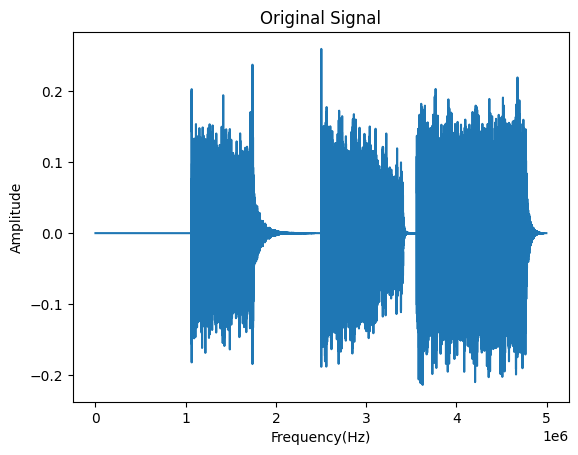

In [19]:
plt.plot(noisy_file)   
plt.title('Original Signal')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

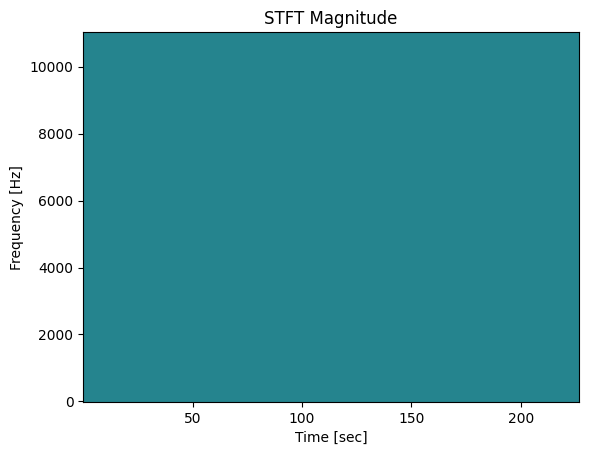

In [35]:
from scipy.fft import fft, ifft

FourierTransformation = fft(noisy_file)  

from scipy import signal
f, t,Zxx = signal.spectrogram(noisy_file,audio_rate, nperseg = 1000)

plt.pcolormesh(t, f, np.abs(Zxx), vmin=min(noisy_file), vmax=max(noisy_file))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

/tmp/ipykernel_441627/2104435373.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  scale = sp.linspace(0, audio_rate, len(noisy_file))


Text(0, 0.5, 'Amplitude')

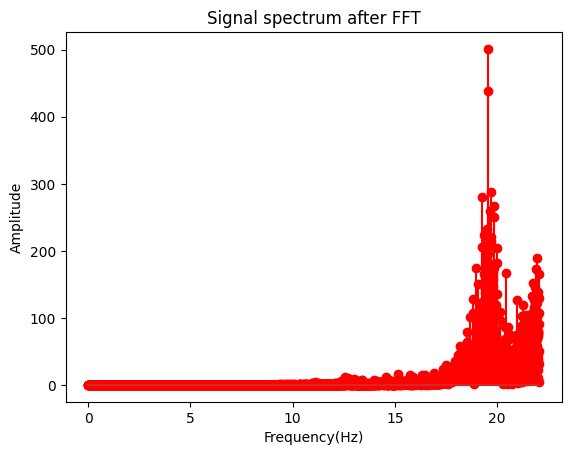

In [27]:
scale = sp.linspace(0, audio_rate, len(noisy_file))  

plt.stem(scale[0:5000], np.abs(FourierTransformation[0:5000]), 'r')    
plt.title('Signal spectrum after FFT')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

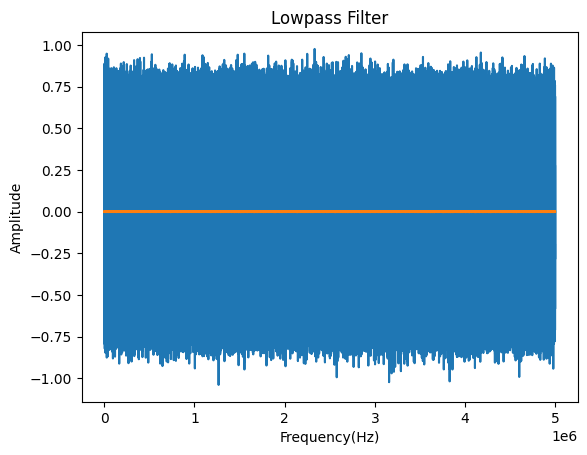

In [28]:



GuassianNoise = np.random.rand(len(FourierTransformation))  


NewSound =  noisy_file - GuassianNoise

Frequency = audio_rate

write("New-Sound-Added-With-Guassian-Noise.wav", Frequency, NewSound)  

b,a = signal.butter(5, 1000/(Frequency/2), btype='highpass')  

filteredSignal = signal.lfilter(b,a,NewSound)  
plt.plot(filteredSignal) # plotting the signal.  
plt.title('Highpass Filter')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  


c,d = signal.butter(5, 380/(Frequency/2), btype='lowpass') # ButterWorth low-filter  
newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal  
plt.plot(newFilteredSignal) # plotting the signal.  
plt.title('Lowpass Filter')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

write("New-Filtered-Sound.wav", Frequency, newFilteredSignal)  


In [3]:
!git clone https://github.com/PrafulAradhyamth/audioprocessing.git

Cloning into 'audioprocessing'...
